In [7]:
# -*- coding: utf-8 -*-
import os
import re
import codecs
from string import punctuation

 
def replace_func(input_file,data_name):
    filename = '.\\process\\'+data_name
    outfile = codecs.open(filename , 'w', 'utf-8')
    with codecs.open(input_file, 'r', 'utf-8') as myfile:
        for line in myfile:
            if line == '' or line.startswith('<doc') or line.startswith('</doc'): continue
            outfile.writelines(line)
    outfile.close()
 
 
def run():
    
    data_path = '.\\extracted\\'
    data_names = ['wiki01.txt','wiki02.txt','wiki03.txt']
    for data_name in data_names:
        replace_func(data_path + data_name, data_name)
        print('{0} has been processed !'.format(data_name))
 
    
if __name__ == '__main__':
    run()
 

wiki01.txt has been processed !
wiki02.txt has been processed !
wiki03.txt has been processed !


In [8]:
from gensim.models import Word2Vec
 
model = Word2Vec.load('.\model\wiki.model')
 
testwords = ['人工智能', '梦想', '自动化', '程序员', '银河']
for i in range(5):
    res = model.most_similar(testwords[i])
    print(testwords[i])
    print(res)


d:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
d:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


人工智能
[('人工智慧', 0.7480980157852173), ('AI', 0.7028647065162659), ('智能', 0.6066256761550903), ('专家系统', 0.5803985595703125), ('计算机', 0.5551459193229675), ('计算机技术', 0.5538640022277832), ('人工神经网络', 0.5508993864059448), ('虚拟现实', 0.5497639179229736), ('模式识别', 0.5476998686790466), ('神经网络', 0.5472321510314941)]
梦想
[('愿望', 0.6169852018356323), ('心愿', 0.602506160736084), ('憧憬', 0.5640087127685547), ('渴望', 0.5221301317214966), ('抱负', 0.5166665315628052), ('志向', 0.5155216455459595), ('梦寐以求', 0.4909277558326721), ('人生目标', 0.4861561059951782), ('梦', 0.48563358187675476), ('追梦', 0.4838047921657562)]
自动化
[('自动控制', 0.6061505079269409), ('系统工程', 0.6054563522338867), ('电脑化', 0.5948458909988403), ('智能化', 0.5940191745758057), ('电子计算机', 0.5831822156906128), ('电子化', 0.5784444212913513), ('系统集成', 0.5650191903114319), ('信息系统', 0.5563763380050659), ('计算机技术', 0.5470543503761292), ('无线通讯', 0.5443048477172852)]
程序员
[('开发人员', 0.7258207201957703), ('开发者', 0.7091096639633179), ('编译器', 0.603945791721344), ('系统管理员', 0.5

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    words = ['人工智能', '梦想', '自动化', '程序员', '银河']
    for word in words:
        for sim, _ in model.wv.most_similar(word, topn=40):
            tokens.append(model[sim])
            labels.append(sim)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='center',
                     va='bottom')
    plt.show()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


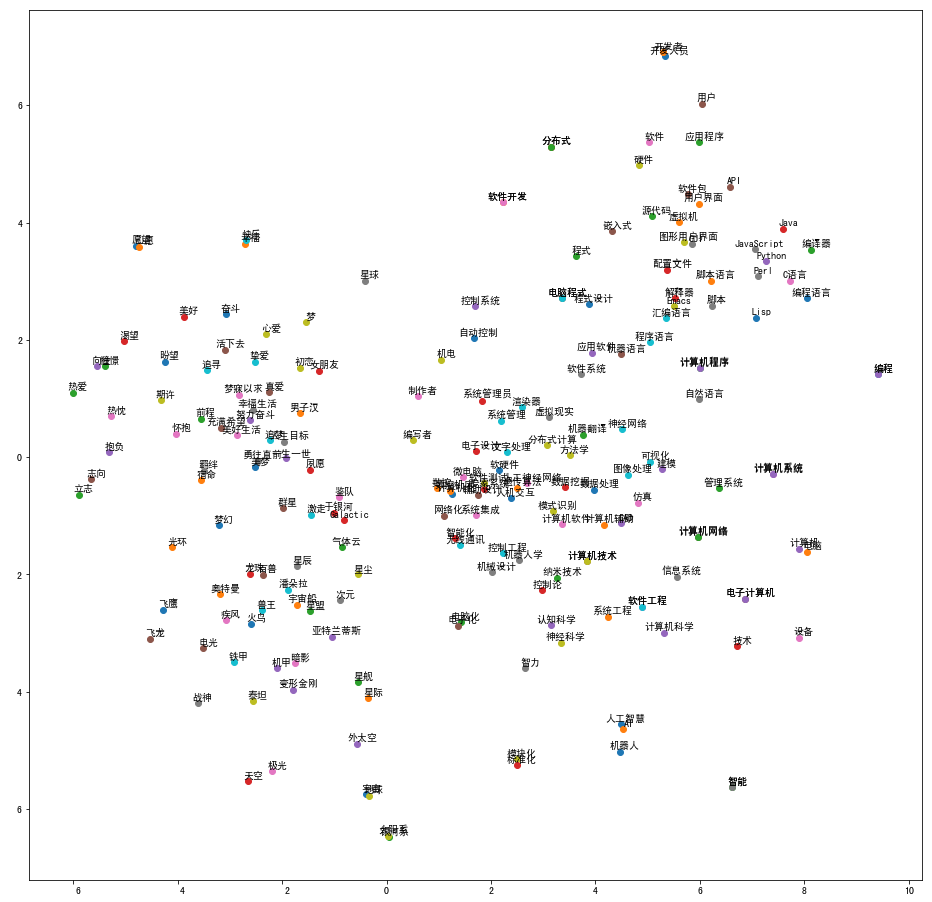

In [11]:
tsne_plot(model)